# Name: Mrunmay Sanjiv Patil

TSF GRIP SPARKS FOUNDATION

Prediction using Unsupervised ML

TASK : 02
"From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually."

For this particular example we have used KMeans Clustering.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [42]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
x = data.iloc[:,[1,2,3,4]].values

In [44]:
sse=[]
k=range(1,20)
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)

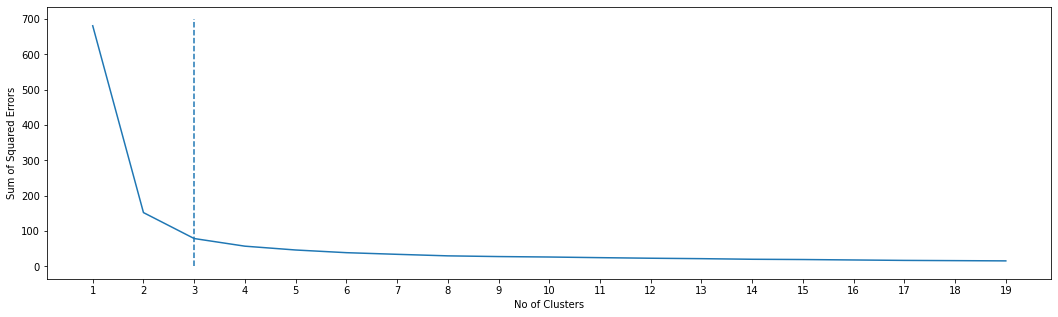

In [45]:
plt.figure(figsize=(18,5))
plt.plot(k,sse)
plt.xticks(k)
plt.xlabel('No of Clusters')
plt.ylabel('Sum of Squared Errors')
#plt.legend()
plt.vlines(3,0,699,linestyles = 'dashed')
plt.show()

In [46]:
final_km = KMeans(n_clusters=3)
y_predicted = final_km.fit_predict(x)
print('New clusters :\n',y_predicted)

New clusters :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [47]:
data['cluster']=y_predicted
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [48]:
data.drop('Species',axis='columns',inplace=True)

c:\users\om\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\om\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\om\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

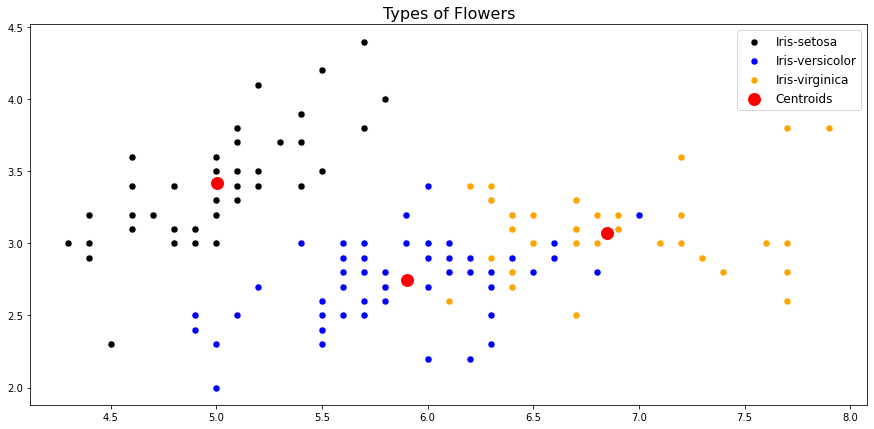

In [51]:
y_kmeans = data.cluster
plt.figure(figsize=(15,7))
sns.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color = 'black', label = 'Iris-setosa',s=50)
sns.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color = 'blue', label = 'Iris-versicolor',s=50)
sns.scatterplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], color = 'orange', label = 'Iris-virginica',s=50)

sns.scatterplot(final_km.cluster_centers_[:, 0], final_km.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=200,marker='o')
plt.grid(False)
plt.title('Types of Flowers', fontsize = 16)
plt.legend(fontsize = 12)
plt.show()